# Sales Data Analysis Mini Project
    Submitted by : Asad Azam
    PRN : 18070122011
    Symbiosis Institute of Technology
    Batch : 2018-22 CS
    E-Mail : asad.azam.btech2018@sitpune.edu.in / asad.azam.asad@gmail.com

# Identifying and importing essential libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

# Task 2: Data loading and overview
### 2.a Loading Dataset from a file:
    Please specify path before running!

In [2]:
path = '/Users/asad/Downloads/Superstore.xls'
xl = pd.ExcelFile(path)

In [3]:
print(xl.sheet_names)
sheet1 = xl.parse('Orders')

['Orders', 'Returns', 'People']


### 2.b Look at the first 5 records of the data

In [4]:
sheet1.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### 2.c Print the columns contained in the data

In [5]:
print(sheet1.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


### 2.d Print the attributes like count, mean, max, min, standard deviation etc

In [6]:
count1 = sheet1['Sales'].count()
mean1 = sheet1['Sales'].mean()
max1 = sheet1['Sales'].max()
min1 = sheet1['Sales'].min()
std1 = sheet1['Sales'].std()
var1 = sheet1['Sales'].var()
median1 = sheet1['Sales'].median() 
sum1 = sheet1['Sales'].sum()

print ('Count of sales: ' + str(count1))
print ('Mean sales: ' + str(mean1))
print ('Max sales: ' + str(max1))
print ('Min sales: ' + str(min1))
print ('Std of sales: ' + str(std1))
print ('Var of sales: ' + str(var1))
print ('Median sales: ' + str(median1))
print ('Sum of sales: ' + str(sum1))

Count of sales: 9994
Mean sales: 229.85800083049833
Max sales: 22638.48
Min sales: 0.44399999999999995
Std of sales: 623.2451005086808
Var of sales: 388434.45530807565
Median sales: 54.489999999999995
Sum of sales: 2297200.8603000003


### 2.e Find out are there any missing or null values in the data for all columns

In [7]:
print("Total NaN/missing in a data : ", sheet1.isnull().sum().sum())

Total NaN/missing in a data :  0


# Task 3: Find out the per unit price from the data
### 3.a Convert date time field into pandas time object

In [8]:
sheet1['Order Date'] = sheet1['Order Date'].apply(pd.to_datetime)

### 3.b Find out the price per unit from the data and create a column for it in the same data

Cost Price per unit = ( Selling Price  - Profit ) / ( Quantity x ( 1 - Discount ))

In [9]:
for i in range(len(sheet1.index)):
    price_per_unit = ( sheet1['Sales'] - sheet1['Profit'] ) / ( sheet1['Quantity'] * ( 1 - sheet1['Discount'] ))
print(price_per_unit)

0       110.02320
1       170.78600
2         3.87430
3       487.49400
4        12.40725
          ...    
9989      8.81050
9990     38.16340
9991    149.48925
9992      4.07000
9993     85.10600
Length: 9994, dtype: float64


# Task 4: Find out the monthly revenue and analyze the findings
### 4.a Create a column with Year and month field only give a suitable name to it

In [10]:
sheet1['Month_Year'] = pd.to_datetime(sheet1['Order Date']).dt.to_period('M')
sheet1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month_Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10


### 4.b Create a separate dataset from the data which will have two columns , one which is created in step a of this task and second the monthly sales / revenue

In [11]:
new_sheet = sheet1[['Month_Year']].copy()
new_sheet['Monthly_Revenue'] = sheet1['Sales']
new_sheet = new_sheet.groupby(['Month_Year'], as_index = False).agg('sum')
print(new_sheet)

   Month_Year  Monthly_Revenue
0     2014-01       14236.8950
1     2014-02        4519.8920
2     2014-03       55691.0090
3     2014-04       28295.3450
4     2014-05       23648.2870
5     2014-06       34595.1276
6     2014-07       33946.3930
7     2014-08       27909.4685
8     2014-09       81777.3508
9     2014-10       31453.3930
10    2014-11       78628.7167
11    2014-12       69545.6205
12    2015-01       18174.0756
13    2015-02       11951.4110
14    2015-03       38726.2520
15    2015-04       34195.2085
16    2015-05       30131.6865
17    2015-06       24797.2920
18    2015-07       28765.3250
19    2015-08       36898.3322
20    2015-09       64595.9180
21    2015-10       31404.9235
22    2015-11       75972.5635
23    2015-12       74919.5212
24    2016-01       18542.4910
25    2016-02       22978.8150
26    2016-03       51715.8750
27    2016-04       38750.0390
28    2016-05       56987.7280
29    2016-06       40344.5340
30    2016-07       39261.9630
31    20

### 4.c Plot this dataset

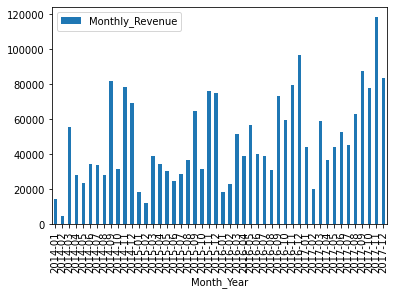

In [12]:
ax = new_sheet.plot.bar(x = 'Month_Year', y = 'Monthly_Revenue')
plt.show()

### 4.d Describe your analysis for the monthly revenue observations.

In [13]:
mean1 = new_sheet['Monthly_Revenue'].mean()
max1 = new_sheet['Monthly_Revenue'].max()
min1 = new_sheet['Monthly_Revenue'].min()

print ('Average Monthly Revenue: ' + str(mean1))
print ('Maximum Monthly Revenue: ' + str(max1))
print ('Minimum Monthly Revenue: ' + str(min1))

Average Monthly Revenue: 47858.35125625
Maximum Monthly Revenue: 118447.82500000003
Minimum Monthly Revenue: 4519.892000000001


Monthly revenue shows an overall increase throughout the months, the revenue is always positive but has deviated from the trend at certain intervals.
- From the data it is evident that **fourth quarter** of every year has shown the highest revenue.
- The **first quarter** of every year shows the least revenue every year.
- The **second quarter** of every year shows stagnation or very less deviation.
- The **third quarter** of every year shows an increase in revenue.

# Task 5: Find out the yearly revenue and analyze the findings
### 5.a Create a column with Year field only give a suitable name to it

In [14]:
sheet1['Year'] = pd.to_datetime(sheet1['Order Date']).dt.to_period('Y')
sheet1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month_Year,Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10,2015


### 5.b Create a separate dataset from the data which will have two columns , one which is created in step a of this task and second the yearly sales / revenue

In [15]:
new_sheet2 = sheet1[['Year']].copy()
new_sheet2['Yearly_Revenue'] = sheet1['Sales']
new_sheet2 = new_sheet2.groupby(['Year'], as_index = False).agg('sum')
print(new_sheet2)

   Year  Yearly_Revenue
0  2014     484247.4981
1  2015     470532.5090
2  2016     609205.5980
3  2017     733215.2552


### 5.c Plot this dataset

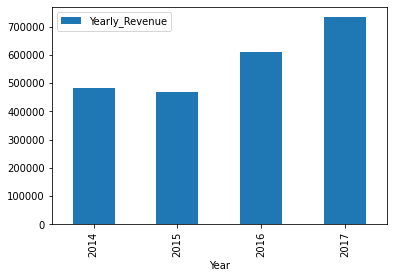

In [16]:
ax = new_sheet2.plot.bar(x = 'Year', y = 'Yearly_Revenue')
plt.show()

### 5.d Describe your analysis for the yearly revenue observations.

In [17]:
mean1 = new_sheet2['Yearly_Revenue'].mean()
max1 = new_sheet2['Yearly_Revenue'].max()
min1 = new_sheet2['Yearly_Revenue'].min()

print ('Average Yearly Revenue: ' + str(mean1))
print ('Maximum Yearly Revenue: ' + str(max1))
print ('Minimum Yearly Revenue: ' + str(min1))

Average Yearly Revenue: 574300.2150750004
Maximum Yearly Revenue: 733215.2551999999
Minimum Yearly Revenue: 470532.50899999985


Yearly revenue has been increasing for the years 2015, 16 and 17 meanwhile there is a minor drop in revenue in 2015 as compared to 2014.

Overall from the data it can be inferred that there is an increasing trend in revenue

# Task 6: Finding out the monthly growth rate and analyse the findings
### 6.a Create a column in the monthly revenue dataset for monthly growth rate

In [18]:
new_sheet['Monthly_Growth'] = new_sheet['Monthly_Revenue'].pct_change() * 100
print(new_sheet)

   Month_Year  Monthly_Revenue  Monthly_Growth
0     2014-01       14236.8950             NaN
1     2014-02        4519.8920      -68.252263
2     2014-03       55691.0090     1132.131409
3     2014-04       28295.3450      -49.192257
4     2014-05       23648.2870      -16.423401
5     2014-06       34595.1276       46.290205
6     2014-07       33946.3930       -1.875220
7     2014-08       27909.4685      -17.783699
8     2014-09       81777.3508      193.009345
9     2014-10       31453.3930      -61.537770
10    2014-11       78628.7167      149.984848
11    2014-12       69545.6205      -11.551882
12    2015-01       18174.0756      -73.867405
13    2015-02       11951.4110      -34.239236
14    2015-03       38726.2520      224.030794
15    2015-04       34195.2085      -11.700186
16    2015-05       30131.6865      -11.883308
17    2015-06       24797.2920      -17.703604
18    2015-07       28765.3250       16.001880
19    2015-08       36898.3322       28.273650
20    2015-09

### 6.b Find out the maximum monthly growth rate

In [19]:
max_monthly_rate = new_sheet['Monthly_Growth'].max()
print(max_monthly_rate, "%")

1132.1314093345597 %


### 6.c Plot the findings

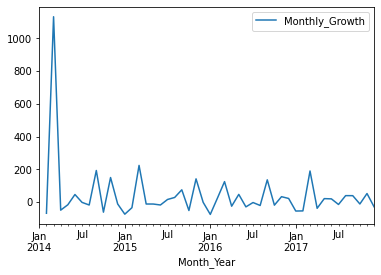

In [20]:
ax = new_sheet.plot.line(x = 'Month_Year', y = 'Monthly_Growth')
plt.show()

### 6.d Describe the findings
    There is a 1132% spike during the first quarter of 2014.
* The graph shows that there is an increasing trend to in the monthly growth rate, as the graph is comparing monthly revenues of concurrent months, it can be inferred that flat lines show no change in revenue while positive slope shows there is an increase in revenue and vice-versa.
* From the data it can be inferred that there is stagnation in monthly profits over the years.

# Task 7: Finding out the most and least sold product id
### 7.a Create a new dataset including the product ids and total quantities sold for that id

In [21]:
sales_sheet = sheet1[['Product ID', 'Quantity']].copy()
sales_sheet = sales_sheet.groupby(['Product ID'], as_index = False).agg('sum')
print(sales_sheet)

           Product ID  Quantity
0     FUR-BO-10000112         9
1     FUR-BO-10000330        10
2     FUR-BO-10000362        14
3     FUR-BO-10000468        21
4     FUR-BO-10000711        12
...               ...       ...
1857  TEC-PH-10004912        11
1858  TEC-PH-10004922        19
1859  TEC-PH-10004924         8
1860  TEC-PH-10004959         4
1861  TEC-PH-10004977        32

[1862 rows x 2 columns]


### 7.b Find out the most sold product from the created dataset

In [22]:
most_sold_product = sales_sheet[sales_sheet['Quantity'] == sales_sheet['Quantity'].max()]
print(most_sold_product)
# details_of_most_sold_product = sheet1[sheet1['Product ID'] == sales_sheet.loc[sales_sheet['Quantity'].idxmax(),'Product ID']]
# details_of_most_sold_product

           Product ID  Quantity
1569  TEC-AC-10003832        75


# Task 8: Finding out the customer who bought most and least from us in terms of quantity
### 8.a Create a dataset containing name and quantities bought

In [23]:
temp_sheet = sheet1[['Customer Name', 'Quantity']].copy()
temp_sheet = temp_sheet.groupby(['Customer Name'], as_index = False).agg('sum')

### 8.b Find out the customer name and quantity, who bought maximum in quantity

In [24]:
most_purchasing_customer = temp_sheet[temp_sheet['Quantity'] == temp_sheet['Quantity'].max()]
print("Customer with most purchases :\n",most_purchasing_customer)
min_purchasing_customer = temp_sheet[temp_sheet['Quantity'] == temp_sheet['Quantity'].min()]
print("\n\nCustomer with least purchases :\n", min_purchasing_customer)

Customer with most purchases :
         Customer Name  Quantity
391  Jonathan Doherty       150


Customer with least purchases :
         Customer Name  Quantity
53  Anthony O'Donnell         2


# Task 9: Finding out the customer who bought most and least from us in terms of value
### 9.a Create a dataset containing name and sales generated by him

In [25]:
customer_sales = sheet1[['Customer Name', 'Sales']].copy()
customer_sales = customer_sales.groupby(['Customer Name'], as_index = False).agg('sum')

### 9. b Find out the customer name and sales, who bought maximum in value

In [26]:
most_purchasing_customer_value = customer_sales[customer_sales['Sales'] == customer_sales['Sales'].max()]
print(most_purchasing_customer_value)

    Customer Name     Sales
686   Sean Miller  25043.05


# Task 10: Finding out the majority and minority customer cities on basis of
### 10.a Number of customers

In [27]:
customer_city = sheet1[['City', 'Customer Name']].copy()
customer_city = customer_city.groupby(['City'], as_index = False).count()
customer_city.columns = ['City','Customer Count']
majority_customer_city = customer_city[customer_city['Customer Count'] == customer_city['Customer Count'].max()]
print("City with most customers :\n", majority_customer_city.reset_index(drop=True))

minority_customer_city = customer_city[customer_city['Customer Count'] == customer_city['Customer Count'].min()]
print("\n\nCities with least customers :\n",minority_customer_city.reset_index(drop=True))

City with most customers :
             City  Customer Count
0  New York City             915


Cities with least customers :
                  City  Customer Count
0            Aberdeen               1
1             Abilene               1
2             Antioch               1
3   Arlington Heights               1
4       Atlantic City               1
..                ...             ...
65          Vacaville               1
66           Waterloo               1
67           Waukesha               1
68           Whittier               1
69            Yucaipa               1

[70 rows x 2 columns]


### 10.b Sales value

In [28]:
customer_city = sheet1[['City', 'Sales']].copy()
customer_city = customer_city.groupby(['City'], as_index = False).sum()

majority_customer_value = customer_city[customer_city['Sales'] == customer_city['Sales'].max()]
print("City with highest sales value :\n" ,majority_customer_value)

minority_customer_value = customer_city[customer_city['Sales'] == customer_city['Sales'].min()]
print("\n\nCity with least sales value :\n",minority_customer_value)

City with highest sales value :
               City       Sales
329  New York City  256368.161


City with least sales value :
       City  Sales
1  Abilene  1.392


### 10.c Number of quantity sold

In [29]:
customer_quantity = sheet1[['City', 'Quantity']].copy()
customer_quantity = customer_quantity.groupby(['City'], as_index = False).sum()

maximum_customer_quantity = customer_quantity[customer_quantity['Quantity'] == customer_quantity['Quantity'].max()]
print("Customer with maximum quantity sold :\n", maximum_customer_quantity)

minimum_customer_quantity = customer_quantity[customer_quantity['Quantity'] == customer_quantity['Quantity'].min()]
print("\n\nCities with minimum quantity sold :\n", minimum_customer_quantity.reset_index(drop=True))

Customer with maximum quantity sold :
               City  Quantity
329  New York City      3417


Cities with minimum quantity sold :
           City  Quantity
0       Elyria         1
1    Iowa City         1
2      Jupiter         1
3  Lindenhurst         1
4    Littleton         1
5  Port Orange         1


# Task 11: Find out the most and least sold product category from the store
### 11.a Value based

In [30]:
sales_category = sheet1[['Category', 'Sales']].copy()
sales_category = sales_category.groupby(['Category'], as_index = False).sum()

maximum_sales_category = sales_category[sales_category['Sales'] == sales_category['Sales'].max()]
print("Category with maximum sales :\n", maximum_sales_category)

minimum_sales_category = sales_category[sales_category['Sales'] == sales_category['Sales'].min()]
print("\n\nCategory with minumum sales :\n", minimum_sales_category)

Category with maximum sales :
      Category       Sales
2  Technology  836154.033


Category with minumum sales :
           Category       Sales
1  Office Supplies  719047.032


### 11.b Quantity based

In [31]:
quantity_category = sheet1[['Category', 'Quantity']].copy()
quantity_category = quantity_category.groupby(['Category'], as_index = False).sum()

maximum_quantity_category = quantity_category[quantity_category['Quantity'] == quantity_category['Quantity'].max()]
print("Category with maximum quantity sold :\n", maximum_quantity_category)

minimum_quantity_category = quantity_category[quantity_category['Quantity'] == quantity_category['Quantity'].min()]
print("\n\nCategory with minimum quantity sold :\n", minimum_quantity_category)

Category with maximum quantity sold :
           Category  Quantity
1  Office Supplies     22906


Category with minimum quantity sold :
      Category  Quantity
2  Technology      6939


# Task 12: Find out the most and least sold product sub category from the store
### 12.a Value based

In [32]:
sales_subcategory = sheet1[['Sub-Category', 'Sales']].copy()
sales_subcategory = sales_subcategory.groupby(['Sub-Category'], as_index = False).sum()

maximum_sales_subcategory = sales_subcategory[sales_subcategory['Sales'] == sales_subcategory['Sales'].max()]
print("Sub-Category with maximum sales :\n", maximum_sales_subcategory)

minimum_sales_subcategory = sales_subcategory[sales_subcategory['Sales'] == sales_subcategory['Sales'].min()]
print("\n\nSub-Category with minimum sales :\n", minimum_sales_subcategory)

Sub-Category with maximum sales :
    Sub-Category       Sales
13       Phones  330007.054


Sub-Category with minimum sales :
   Sub-Category    Sales
8    Fasteners  3024.28


### 12.b Quantity based

In [33]:
quantity_subcategory = sheet1[['Sub-Category', 'Quantity']].copy()
quantity_subcategory = quantity_subcategory.groupby(['Sub-Category'], as_index = False).sum()

maximum_quantity_category = quantity_subcategory[quantity_subcategory['Quantity'] == quantity_subcategory['Quantity'].max()]
print("Sub-Category with maximum quantity sold :\n", maximum_quantity_category)

minimum_quantity_category = quantity_subcategory[quantity_subcategory['Quantity'] == quantity_subcategory['Quantity'].min()]
print("\n\nSub-Category with minimum quantity sold :\n", minimum_quantity_category)

Sub-Category with maximum quantity sold :
   Sub-Category  Quantity
3      Binders      5974


Sub-Category with minimum quantity sold :
   Sub-Category  Quantity
6      Copiers       234
